## Testes e IC 1 - Respondendo a pergunta 1(influência do gênero)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df_with_one_hot = pd.read_csv('../dataset/songs_one_hot_encoding.csv',
                 encoding='iso-8859-1', na_values='unknown')

df_with_genre_list = pd.read_csv('../dataset/songs_with_genre.csv',
                 encoding='iso-8859-1', na_values='unknown')

relevant_genres = pd.read_csv('../dataset/genres_relevant.csv',
                 encoding='iso-8859-1', na_values='unknown')

In [3]:
relevant_genres

,genre,quantity
0,pop,2945
1,dance pop,2574
2,pop rap,2110
3,rap,1725
4,post-teen pop,1496
5,hip hop,1283
6,r&b,1277
7,contemporary country,1212
8,southern hip hop,1132
9,country,1130


In [4]:
#agrupa por gênero para tirar estatísticas
def group_by_genre(relevant_genres, df_genre_rank):    
    genre_stats = {}
    for i in range(relevant_genres.shape[0]):
        genres = relevant_genres.iloc[i]['genre']
        df_genres = df_genre_rank[['peak_pos', 'weeks', 'rank', genres]]
        group_genre = df_genres[df_genres[genres] == 1]
        group_genre = group_genre.mean()[['peak_pos', 'weeks', 'rank']]
        
        genre_stats[genres] = group_genre

    return pd.DataFrame.from_dict(genre_stats, orient='index')

In [5]:
genre_stats = group_by_genre(relevant_genres, df_with_one_hot)
genre_stats

,peak_pos,weeks,rank
contemporary country,50.299505,15.967822,82.117987
country,49.975221,16.169912,82.679646
country road,50.584699,16.113843,82.539162
dance pop,40.780886,14.259518,72.769619
hip hop,46.874513,12.737334,77.037412
hip pop,40.401075,16.301075,75.610753
pop,43.577250,13.594567,72.752801
pop rap,44.524171,14.124171,75.250237
post-teen pop,42.266711,12.546123,71.719920
r&b,39.548160,16.174628,74.144871


In [6]:
def bootstrap(df, n = 10000):
    size = len(df)
    values = []
    
    for i in range(n):
        sample = df_with_one_hot.sample(size, replace=True)
        values.append(group_by_genre(relevant_genres, sample)['peak_pos'])
    return values

In [7]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [8]:
bootstrap_result = pd.DataFrame(bootstrap(df_with_one_hot ,1000))
bootstrap_result

,contemporary country,country,country road,dance pop,hip hop,hip pop,pop,pop rap,post-teen pop,r&b,rap,southern hip hop,trap music,urban contemporary
peak_pos,49.633065,49.505245,49.830797,39.334116,46.502728,39.086718,42.580513,43.845823,40.746835,38.472266,47.110000,48.040870,51.136606,38.734469
peak_pos,49.394671,49.043088,49.608656,40.379138,46.816092,39.297710,43.309817,43.867419,41.113560,38.872209,47.547660,48.771626,53.181722,39.141376
peak_pos,50.738173,50.492982,50.952425,41.069713,46.695416,39.762487,44.099329,44.521698,42.616502,39.593168,47.697513,48.831701,52.980371,39.425852
peak_pos,50.325449,50.000881,50.495898,41.085932,47.923729,40.173774,43.183416,45.247642,42.971668,39.622901,47.576056,48.092511,51.657016,39.169703
peak_pos,50.494300,50.283101,50.865712,41.648239,47.111197,41.936126,43.864902,45.306277,43.047059,41.317300,47.568433,48.938588,51.933333,41.734612
peak_pos,49.649351,49.435720,49.880250,40.432938,47.564976,38.624481,43.424171,43.171524,41.790607,37.894777,47.386431,47.471285,50.474286,39.239923
peak_pos,49.258735,48.793833,49.518039,40.267115,47.436719,40.957001,43.430627,44.370284,42.325645,39.424071,47.692042,48.106796,52.630108,38.673077
peak_pos,51.527380,50.980269,51.673451,41.157529,45.745156,40.856688,43.730265,44.276656,43.509987,39.423769,46.769231,48.391833,50.899586,40.142717
peak_pos,50.312292,49.936720,50.514155,39.619307,48.329787,41.704570,43.092693,45.210405,40.869764,39.303371,48.057208,48.776419,52.889119,39.618257
peak_pos,51.463272,50.710289,52.018622,39.539239,46.940377,40.094693,42.335037,44.829461,41.419060,38.295807,46.966170,49.232699,51.131183,38.918892


In [9]:
bootstrap_result = bootstrap_result.reindex(bootstrap_result.mean().sort_values().index, axis=1)

In [10]:
result_copy = bootstrap_result.copy()
averages = result_copy.mean()
averages_sorted = averages.sort_values()

In [11]:
real_peak_pos = {"a": 40}
keys = averages_sorted.keys()
for i in range(len(averages_sorted)):
    for j in genre_stats.index:
        if j == keys[i]:
            real_peak_pos[keys[i]] = genre_stats.get_value(j, col='peak_pos')

real_peak_pos = pd.Series(real_peak_pos)
real_peak_pos

C:\Users\Juliana\IBRAHIM\Development\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: get_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


a                       40.000000
r&b                     39.548160
urban contemporary      39.831349
hip pop                 40.401075
dance pop               40.780886
post-teen pop           42.266711
pop                     43.577250
pop rap                 44.524171
hip hop                 46.874513
rap                     47.384348
southern hip hop        48.575972
country                 49.975221
contemporary country    50.299505
country road            50.584699
trap music              52.410423
dtype: float64

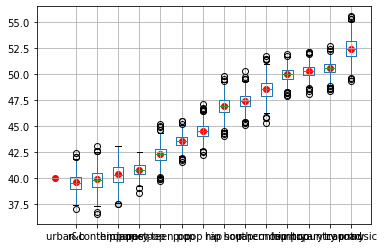

In [12]:


bootstrap_result.boxplot()
plt.scatter(y=real_peak_pos.values, x=real_peak_pos.keys(), color='red')
plt.show()



In [13]:
bootstrap_top5 = bootstrap_result.loc[:, real_peak_pos.index[1:6]]
bootstrap_bottom5 = bootstrap_result.loc[:, real_peak_pos.index[-5:]]
bootstrap_top5

,r&b,urban contemporary,hip pop,dance pop,post-teen pop
peak_pos,38.472266,38.734469,39.086718,39.334116,40.746835
peak_pos,38.872209,39.141376,39.297710,40.379138,41.113560
peak_pos,39.593168,39.425852,39.762487,41.069713,42.616502
peak_pos,39.622901,39.169703,40.173774,41.085932,42.971668
peak_pos,41.317300,41.734612,41.936126,41.648239,43.047059
peak_pos,37.894777,39.239923,38.624481,40.432938,41.790607
peak_pos,39.424071,38.673077,40.957001,40.267115,42.325645
peak_pos,39.423769,40.142717,40.856688,41.157529,43.509987
peak_pos,39.303371,39.618257,41.704570,39.619307,40.869764
peak_pos,38.295807,38.918892,40.094693,39.539239,41.419060


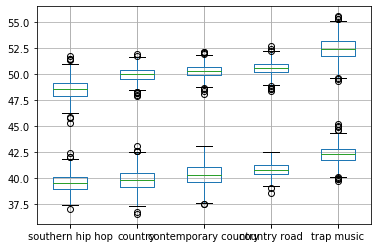

In [14]:
bootstrap_top5.boxplot()
bootstrap_bottom5.boxplot()

plt.show()

Olhando os resultados encontrados no boxplot a partir do bootstrap, percebemos que todas as médias estão no IC encontrado, logo não é possível rejeitar a hipótese nula. Ou seja, não é possível concluir que o gênero, por si só, impacta o potencial da música no top 100 da billboard.<br>

Contudo, olhando o segundo boxplot, que compara os cinco gêneros com maior média no peak_pos e os cinco gêneros com menor média no peak_pos, percebemos que os ICs não se cruzam, e, portanto, o fator gênero possui importância para determinar o quão alto a música vai no top 100, indicando que alguns gêneros(no exemplo, r&b, urban contemporary, dance pop, hip pop e post-teen pop) têm uma chance maior de alcançar posições mais altas.

In [15]:
df = df_with_genre_list[['energy', 'liveness', 'tempo', 'speechiness', 'acousticness', 'instrumentalness', 'time_signature', 'danceability', 'key', 'duration_ms', 'loudness', 'valence', 'mode']]
pd.DataFrame(df.mean())

,0
energy,0.693821
liveness,0.185588
tempo,122.174024
speechiness,0.103958
acousticness,0.165550
instrumentalness,0.013020
time_signature,3.974322
danceability,0.624660
key,5.251498
duration_ms,231931.086733
